In [63]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [500]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

#---
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

from IPython.display import Math

import warnings
warnings.filterwarnings('ignore')

In [501]:
df = pd.read_csv("titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [502]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [503]:
#EDA
df.shape

(891, 12)

In [504]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [505]:
column_names = df.columns
column_names

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [506]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [507]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [508]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [509]:
column_names = df.columns
column_names

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [510]:
trainMeans = df.groupby(['Pclass', 'Sex'])['Age'].mean()
def f(x):
    if not np.isnan(x["Age"]):  # not NaN
        return x["Age"]
    return trainMeans[x["Pclass"], x["Sex"]]
df['Age'] = df.apply(f, axis=1)
#self.test['Age'] = self.test.apply(f, axis=1)

In [511]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [512]:
df["Cabin"].fillna("C23 C25 C27", inplace = True)

In [517]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [518]:
df.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,C23 C25 C27,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,C23 C25 C27,S
5,6,0,3,"Moran, Mr. James",male,26.507589,0,0,330877,8.4583,C23 C25 C27,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,C23 C25 C27,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,C23 C25 C27,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C23 C25 C27,C


In [519]:
y_train = df["Survived"]
y_train.head(2)

0    0
1    1
Name: Survived, dtype: int64

# Embarked

In [521]:
# Calculate the overall average fare
average_fare = df['Fare'].mean()

# Fill null 'Fare' values with the overall average fare
df['Fare'] = df['Fare'].fillna(average_fare/5)

In [522]:
# Group by 'Embarked' and calculate frequency and mean of 'Fare'
embarked_stats = df.groupby('Embarked').agg({'Embarked': 'count', 'Fare': 'mean'}).rename(columns={'Embarked': 'Frequency', 'Fare': 'Mean Fare'})

# Print the frequency and mean fare for each 'Embarked' value
print(embarked_stats)

          Frequency  Mean Fare
Embarked                      
C               168  59.954144
Q                77  13.276030
S               646  27.243651


In [523]:
# Find rows where 'Fare' column is null
rows_with_null_fare = df[df['Embarked'].isnull()]

# Print the rows with null 'Fare'
print(rows_with_null_fare)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [524]:
df.drop('Ticket', axis=1, inplace=True)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,C23 C25 C27,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C


In [526]:
custom_colors = ['#FF5733', '#FFC300', '#FF5733', '#C70039', '#900C3F', '#581845', 
                 '#FFC300', '#DAF7A6', '#1287A5', '#F4D03F', '#00D2D3', '#FF5733', 
                 '#900C3F', '#581845', '#FFC300', '#DAF7A6', '#1287A5', '#F4D03F', 
                 '#00D2D3', '#FF5733']

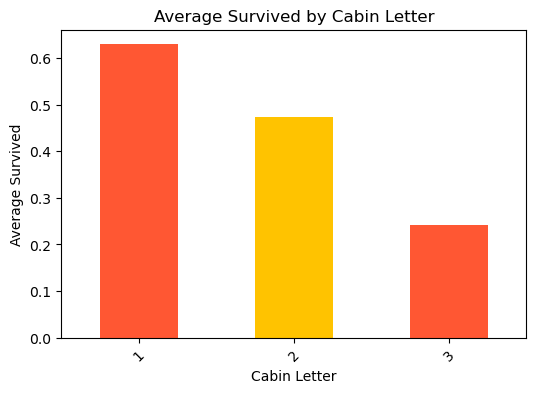

        count      mean       std  min  25%  50%  75%  max
Pclass                                                    
1       216.0  0.629630  0.484026  0.0  0.0  1.0  1.0  1.0
2       184.0  0.472826  0.500623  0.0  0.0  0.0  1.0  1.0
3       491.0  0.242363  0.428949  0.0  0.0  0.0  0.0  1.0


In [529]:
# Calculate average SalePrice for each MSZoning category
average_cabin = df.groupby('Pclass')['Survived'].mean().sort_values(ascending=False)

# Bar plot to visualize average SalePrice for each MSZoning category
plt.figure(figsize=(6, 4))
average_cabin.plot(kind='bar', color=custom_colors)
plt.title('Average Survived by Cabin')
plt.xlabel('Cabin Letter')
plt.ylabel('Average Survived')
plt.xticks(rotation=45)
plt.show()

# Summary statistics for SalePrice grouped by MSZoning
summary_stats = df.groupby('Pclass')['Survived'].describe()
print(summary_stats)

In [533]:
train_df.head(2)

,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new_Age
0,0,3,male,1,0,A/5 21171,7.2500,NaN,S,22.0
1,1,1,female,1,0,PC 17599,71.2833,C85,C,38.0


In [536]:
label_encoder = LabelEncoder()

categorical_columns = df.select_dtypes(include=['O']).columns.tolist()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
    
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,7.2500,63,2
1,2,1,1,190,0,38.0,1,0,71.2833,81,0


# Age

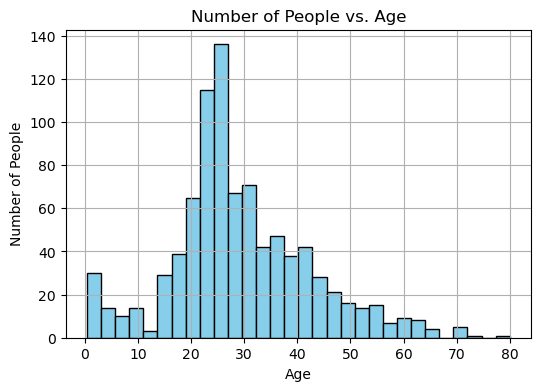

In [538]:
# Plot a histogram of the 'Age' column
plt.figure(figsize=(6, 4))
plt.hist(df["Age"], bins=30, color='skyblue', edgecolor='black')
plt.title('Number of People vs. Age')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.grid(True)
plt.show()

In [541]:
# Define bins and labels for age groups
bins = [0, 10, 20, 30, 45, 60, float('inf')]
labels = [0, 1, 2, 3, 2, 1]

# Create a new column 'AgeGroup' based on the 'Age' column
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False,ordered=False)

#df.drop('Age', axis=1, inplace=True)

# Print the DataFrame with the new 'AgeGroup' column
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,108,1,22.0,1,0,7.2500,63,2,2
1,2,1,1,190,0,38.0,1,0,71.2833,81,0,3


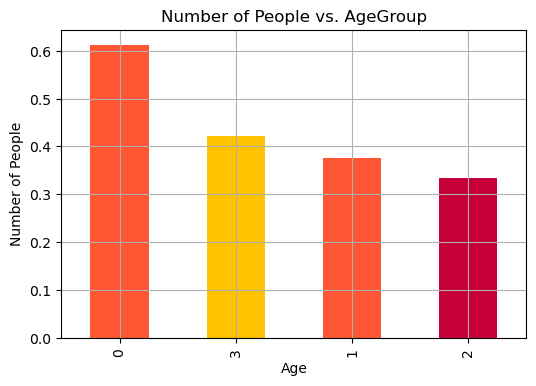

In [543]:
average_AgeGroup = df.groupby('AgeGroup')['Survived'].mean().sort_values(ascending=False)
# Plot a histogram of the 'Age' column

plt.figure(figsize=(6, 4))
average_AgeGroup.plot(kind='bar', color=custom_colors)
plt.title('Number of People vs. AgeGroup')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.grid(True)
plt.show()

# Family

In [545]:
# Convert 'SibSp' and 'Parch' based on specified conditions
df['SibSp'] = df['SibSp'].apply(lambda x: 0 if x == 0 else 2 if x in [1, 2] else 1)
df['Parch'] = df['Parch'].apply(lambda x: 0 if x == 0 else 2 if x in [1, 2] else 1)

# Print the updated DataFrame
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,108,1,22.0,2,0,7.2500,63,2,2
1,2,1,1,190,0,38.0,2,0,71.2833,81,0,3


# Fare Prices

In [547]:
# Convert the fare data to a NumPy array
fare_data = np.array(df["Fare"])
print(fare_data)

[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55     8.05    31.275    7.8542  16.
  29.125   13.      18.       7.225   26.      13.       8.0292  35.5
  21.075   31.3875   7.225  263.       7.8792   7.8958  27.7208 146.5208
   7.75    10.5     82.1708  52.       7.2292   8.05    18.      11.2417
   9.475   21.       7.8958  41.5792   7.8792   8.05    15.5      7.75
  21.6792  17.8     39.6875   7.8     76.7292  26.      61.9792  35.5
  10.5      7.2292  27.75    46.9      7.2292  80.      83.475   27.9
  27.7208  15.2458  10.5      8.1583   7.925    8.6625  10.5     46.9
  73.5     14.4542  56.4958   7.65     7.8958   8.05    29.      12.475
   9.       9.5      7.7875  47.1     10.5     15.85    34.375    8.05
 263.       8.05     8.05     7.8542  61.175   20.575    7.25     8.05
  34.6542  63.3583  23.      26.       7.8958   7.8958  77.2875   8.6542
   7.925    7.8958   7.65     7.775    7.8958  24.15    52.      14.4542
  

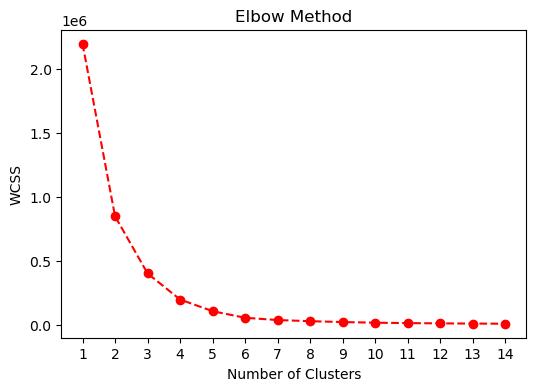

In [548]:
# Calculate WCSS for different values of k
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(fare_data.reshape(-1, 1))
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(6, 4))
plt.plot(range(1, 15), wcss, marker='o', linestyle='--',color="red")
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.xticks(np.arange(1, 15, 1))
plt.show()

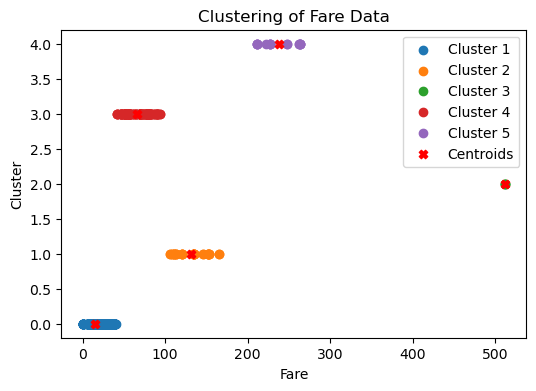

Cluster Labels:
[0 3 0 3 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 1 0 0 3 3 0
 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 3 0 3 0 0 0 0 3 0 3 3 0 0 0 0 0 0 0 0 3 3 0
 3 0 0 0 0 0 0 0 0 3 0 0 0 0 4 0 0 0 3 0 0 0 0 3 0 0 0 0 3 0 0 0 0 0 0 0 3
 0 0 0 0 0 0 0 4 0 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 0 0 0 0 0 0 0 0
 0 0 0 3 0 0 0 3 0 0 0 3 0 0 0 0 0 0 3 0 0 3 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0
 3 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 3 0 0 0
 0 0 3 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 3 0 0 0 0 0 0 0 3 3 2
 0 0 0 3 0 0 0 0 0 1 1 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 0 0
 0 1 0 4 0 0 0 0 0 1 1 1 0 3 3 4 0 0 0 0 0 0 1 1 0 0 0 0 3 1 0 0 0 3 0 0 1
 0 1 0 3 1 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 3 0 0 3
 3 0 0 1 0 3 0 4 0 0 4 0 0 3 0 3 3 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 1 0 0 4 0 0 0 0 0
 0 3 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 3
 0 0 0 3 

In [550]:
# Convert the fare data to a NumPy array
fare_data = np.array(df["Fare"])

# Reshape the fare data to be a 2D array
fare_data_reshaped = fare_data.reshape(-1, 1)

# Define the optimal number of clusters (found using the Elbow Method)
optimal_clusters = 5

# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(fare_data_reshaped)

# Visualize the clusters and data points
plt.figure(figsize=(6, 4))
for i in range(optimal_clusters):
    plt.scatter(fare_data_reshaped[cluster_labels == i], [i] * len(fare_data_reshaped[cluster_labels == i]), label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_, np.arange(optimal_clusters), color='red', marker='X', label='Centroids')
plt.xlabel('Fare')
plt.ylabel('Cluster')
plt.title('Clustering of Fare Data')
plt.legend()
plt.show()

# Output the cluster labels for each data point
print("Cluster Labels:")
print(cluster_labels)

In [552]:
# Assuming you have determined the optimal number of clusters (optimal_clusters) using the Elbow Method
optimal_clusters = 5  # Replace this with the actual optimal number of clusters

# Fare data (assuming you already have this data)
fare_data = np.array(df["Fare"])

# Reshape the fare data to be a 2D array
fare_data_reshaped = fare_data.reshape(-1, 1)

# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(fare_data_reshaped)

# Add the cluster labels as a new column to the DataFrame
df["Fare_Cluster"] = cluster_labels

In [553]:
# List of features to be dropped
features_to_drop = ["Fare"]

# Drop the specified features from the concatenated DataFrame
df.drop(features_to_drop, axis=1, inplace=True)

# Now, concatenated_df does not contain the specified features
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Cabin,Embarked,AgeGroup,Fare_Cluster
0,1,0,3,108,1,22.0,2,0,63,2,2,0
1,2,1,1,190,0,38.0,2,0,81,0,3,3


# Draw Charts

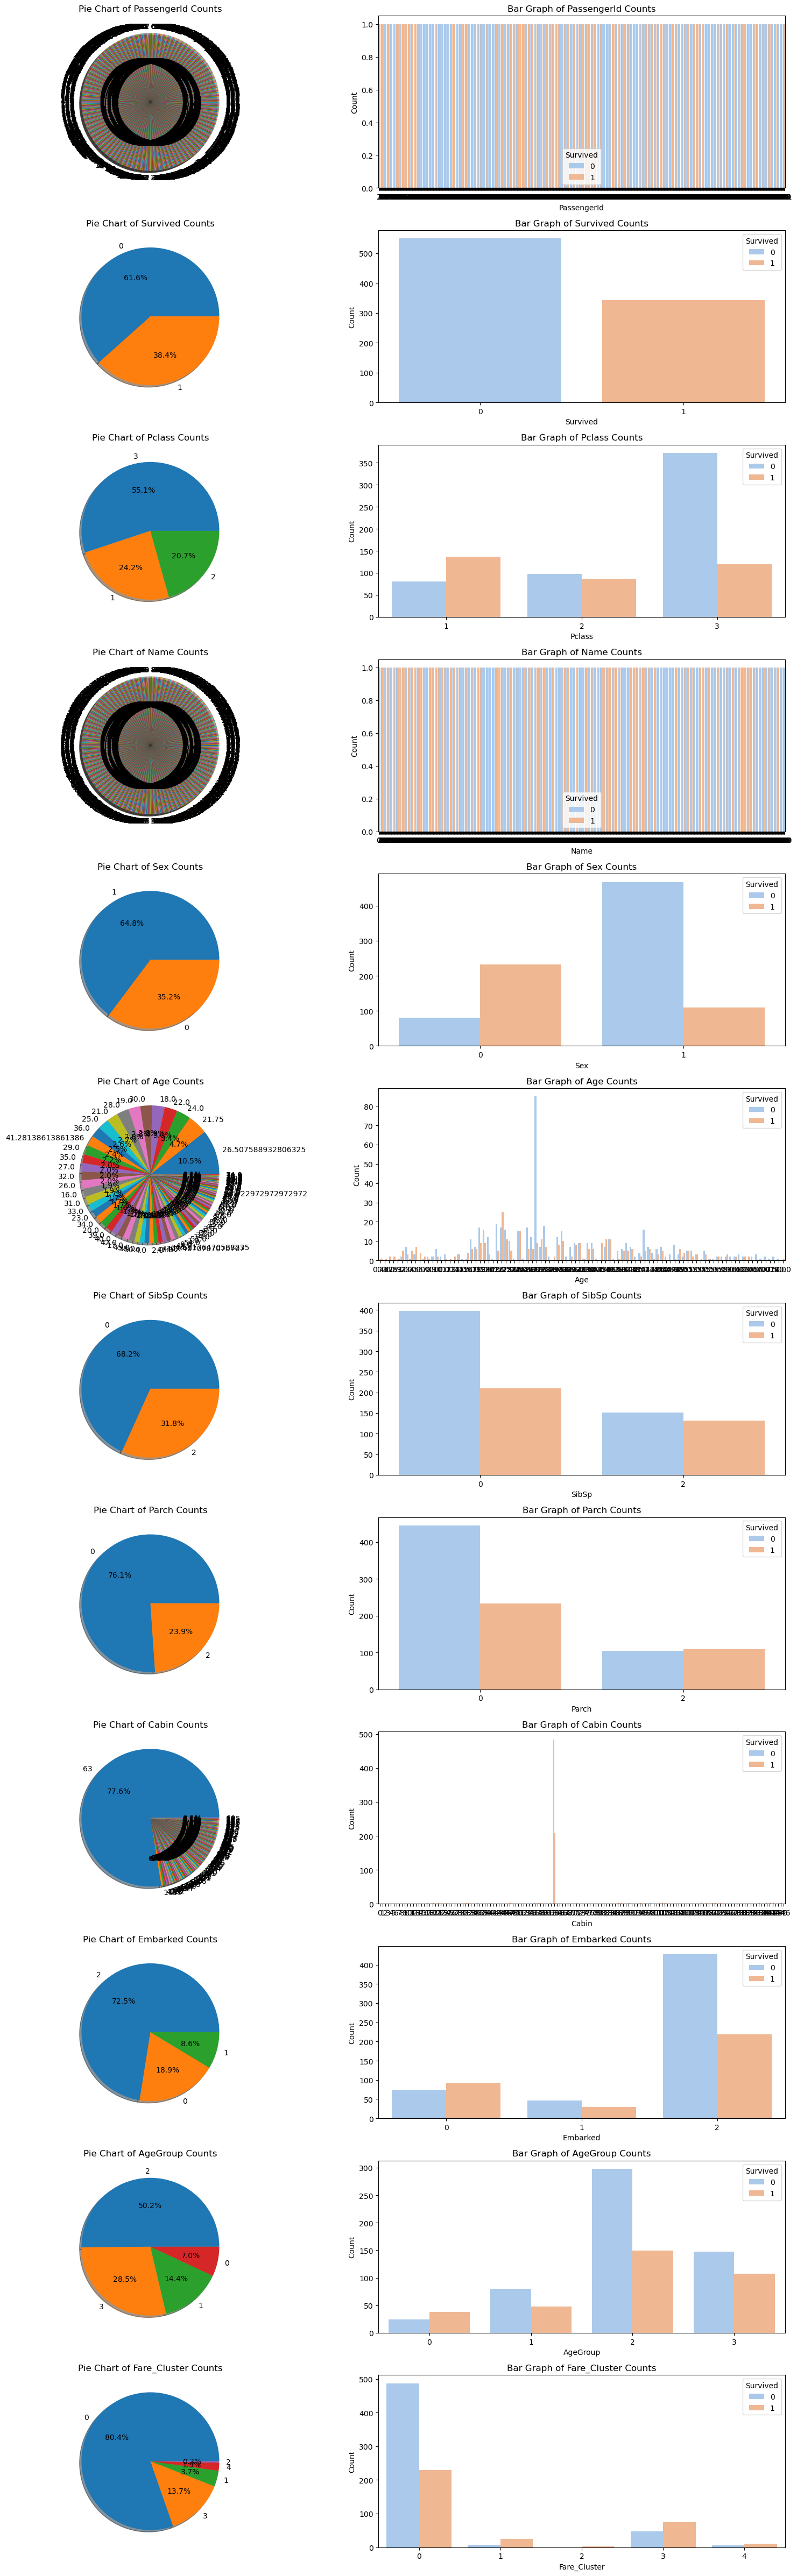

In [554]:
# Assuming univalue_columns is a list of column names containing unique values
columns_list = df.columns

# Set up subplots
fig, axs = plt.subplots(len(columns_list), 2, figsize=(16, 4 * len(columns_list)))

for i, column in enumerate(columns_list):
    count_labels = df[column].value_counts()

    # Plot pie chart
    axs[i, 0].pie(count_labels, labels=count_labels.index, autopct='%.1f%%', shadow=True)
    axs[i, 0].set_title(f'Pie Chart of {column} Counts')

    # Plot countplot
    sns.countplot(data = df, x=column, hue='Survived', palette='pastel', ax=axs[i, 1])
    axs[i, 1].set_title(f'Bar Graph of {column} Counts')
    axs[i, 1].set_ylabel('Count')  # Assuming you want a y-label for the countplot

# Adjust layout and show plots
plt.tight_layout()
plt.show()

In [555]:
train_df.drop('Survived', axis=1, inplace=True)
train_df.head(2)

,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new_Age,PClass_1,PClass_2,PClass_3
0,male,1,0,A/5 21171,7.2500,NaN,S,22.0,False,False,True
1,female,1,0,PC 17599,71.2833,C85,C,38.0,True,False,False


# REGRESSION

In [559]:
df = df.drop(columns = ['Name','Sex','Cabin','Embarked'])
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,AgeGroup,Fare_Cluster
0,1,0,3,22.00,2,0,2,0
1,2,1,1,38.00,2,0,3,3
2,3,1,3,26.00,0,0,2,0
3,4,1,1,35.00,2,0,3,3
4,5,0,3,35.00,0,0,3,0
...,...,...,...,...,...,...,...,...
886,887,0,2,27.00,0,0,2,0
887,888,1,1,19.00,0,0,1,0
888,889,0,3,21.75,2,2,2,0
889,890,1,1,26.00,0,0,2,0


In [560]:
# Get the index where the train and test data were originally separated
train_data_index = len(train_df)

# Split the concatenated data back into train and test sets
X_train = df[:train_data_index]

In [561]:
# Initialize the models
LogisticRegression_reg = LogisticRegression()
svc_reg = SVC()
KNeighborsClassifier_reg =  KNeighborsClassifier(n_neighbors = 3)
linear_svc = LinearSVC()
decision_tree_reg = DecisionTreeClassifier()
random_forest_reg = RandomForestClassifier(n_estimators=100)

In [562]:
# Train the models
LogisticRegression_reg.fit(X_train, y_train)
svc_reg.fit(X_train, y_train)
KNeighborsClassifier_reg.fit(X_train, y_train)
linear_svc.fit(X_train, y_train)
decision_tree_reg.fit(X_train, y_train)
random_forest_reg.fit(X_train, y_train)

RandomForestClassifier()

In [563]:
# Make predictions using the trained models
LogisticRegression_reg_preds = LogisticRegression_reg.predict(X_train)
svc_reg_preds = svc_reg.predict(X_train)
KNeighborsClassifier_reg_preds = KNeighborsClassifier_reg.predict(X_train)
linear_svc_reg_preds = linear_svc.predict(X_train)
decision_tree_reg_preds = decision_tree_reg.predict(X_train)
random_forest_reg_preds = random_forest_reg.predict(X_train)

In [564]:
# Create a DataFrame with predictions
predictions_df = pd.DataFrame({
    'Logistic Regression': LogisticRegression_reg_preds,
    'Support Vector Machines': svc_reg_preds,
    'KNN': KNeighborsClassifier_reg_preds,
    'Linear SVC': linear_svc_reg_preds,
    'Decision Tree': decision_tree_reg_preds,
    'Random Forest': random_forest_reg_preds
})

In [565]:
# Assuming your DataFrame is named 'predictions_df' Calculate the maximum value in each row
max_values = predictions_df.sum(axis=1)

# Set the answer to 1 if the maximum value in the row is 1, otherwise set it to 0
answers = max_values.apply(lambda x: 1 if x >=4  else 0)

In [567]:
df.head(20)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,AgeGroup,Fare_Cluster
0,1,0,3,22.000000,2,0,2,0
1,2,1,1,38.000000,2,0,3,3
2,3,1,3,26.000000,0,0,2,0
3,4,1,1,35.000000,2,0,3,3
4,5,0,3,35.000000,0,0,3,0
5,6,0,3,26.507589,0,0,2,0
6,7,0,1,54.000000,0,0,2,3
7,8,0,3,2.000000,2,2,0,0
8,9,1,3,27.000000,0,2,2,0
9,10,1,2,14.000000,2,0,1,0


In [569]:
#Feature Selection
column_train=['Age','Pclass','SibSp','Parch']
#training values
X = df[column_train]
#target value
Y=df['Survived']

In [570]:
#Training Testing and Spliting the model
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [573]:
X['Age'].isnull().sum()
X['Pclass'].isnull().sum()
X['SibSp'].isnull().sum()
X['Parch'].isnull().sum()

0

In [574]:
#now we have to fill all the missing values
#age have 177  missing values
#either we fill missing values with mean or median form existing values 
X['Age']=X['Age'].fillna(X['Age'].median())
X['Age'].isnull().sum()

0

In [576]:
df.head(20)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,AgeGroup,Fare_Cluster
0,1,0,3,22.000000,2,0,2,0
1,2,1,1,38.000000,2,0,3,3
2,3,1,3,26.000000,0,0,2,0
3,4,1,1,35.000000,2,0,3,3
4,5,0,3,35.000000,0,0,3,0
5,6,0,3,26.507589,0,0,2,0
6,7,0,1,54.000000,0,0,2,3
7,8,0,3,2.000000,2,2,0,0
8,9,1,3,27.000000,0,2,2,0
9,10,1,2,14.000000,2,0,1,0


# Correlation

In [579]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,AgeGroup,Fare_Cluster
PassengerId,1.000000,-0.005007,-0.035144,0.039636,-0.053397,0.005167,0.034244,0.004936
Survived,-0.005007,1.000000,-0.338481,-0.067485,0.115867,0.147408,-0.048764,0.233107
Pclass,-0.035144,-0.338481,1.000000,-0.407015,-0.076009,-0.027526,-0.187873,-0.551144
Age,0.039636,-0.067485,-0.407015,1.000000,-0.154778,-0.261443,0.518169,0.153600
SibSp,-0.053397,0.115867,-0.076009,-0.154778,1.000000,0.420233,-0.182441,0.244183
Parch,0.005167,0.147408,-0.027526,-0.261443,0.420233,1.000000,-0.351993,0.158693
AgeGroup,0.034244,-0.048764,-0.187873,0.518169,-0.182441,-0.351993,1.000000,0.068829
Fare_Cluster,0.004936,0.233107,-0.551144,0.153600,0.244183,0.158693,0.068829,1.000000


In [580]:
#Using LogisticRegression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.6977611940298507


In [581]:
#Confusion Matrix
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_mat = confusion_matrix(Y_test,Y_pred)
print(confusion_mat)

[[136  20]
 [ 61  51]]


In [582]:
#Using Support Vector
from sklearn.svm import SVC
model1 = SVC()
model1.fit(X_train,Y_train)

pred_y = model1.predict(X_test)

from sklearn.metrics import accuracy_score
print("Acc=",accuracy_score(Y_test,pred_y))

Acc= 0.582089552238806


In [583]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,pred_y)
print(confusion_mat)
print(classification_report(Y_test,pred_y))

[[149   7]
 [105   7]]
              precision    recall  f1-score   support

           0       0.59      0.96      0.73       156
           1       0.50      0.06      0.11       112

    accuracy                           0.58       268
   macro avg       0.54      0.51      0.42       268
weighted avg       0.55      0.58      0.47       268



In [586]:
#Using KNN Neighbors
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train,Y_train)
y_pred2 = model2.predict(X_test)
y_pred3 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred2))

Accuracy Score: 0.6791044776119403


In [587]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,y_pred2)
print(confusion_mat)
print(classification_report(Y_test,y_pred3))

[[135  21]
 [ 65  47]]
              precision    recall  f1-score   support

           0       0.68      0.87      0.76       156
           1       0.69      0.42      0.52       112

    accuracy                           0.68       268
   macro avg       0.68      0.64      0.64       268
weighted avg       0.68      0.68      0.66       268



In [588]:
#Using GaussianNB
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,Y_train)
y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred3))

Accuracy Score: 0.6716417910447762


In [589]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,y_pred3)
print(confusion_mat)
print(classification_report(Y_test,y_pred3))

[[123  33]
 [ 55  57]]
              precision    recall  f1-score   support

           0       0.69      0.79      0.74       156
           1       0.63      0.51      0.56       112

    accuracy                           0.67       268
   macro avg       0.66      0.65      0.65       268
weighted avg       0.67      0.67      0.66       268



In [590]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(X_train,Y_train)
y_pred4 = model4.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred4))

Accuracy Score: 0.6902985074626866


In [591]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,y_pred4)
print(confusion_mat)
print(classification_report(Y_test,y_pred4))

[[137  19]
 [ 64  48]]
              precision    recall  f1-score   support

           0       0.68      0.88      0.77       156
           1       0.72      0.43      0.54       112

    accuracy                           0.69       268
   macro avg       0.70      0.65      0.65       268
weighted avg       0.70      0.69      0.67       268



In [592]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'Naive Bayes','KNN' ,'Decision Tree'],
    'Score': [0.75,0.66,0.76,0.66,0.74]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.76,Naive Bayes
0.75,Logistic Regression
0.74,Decision Tree
0.66,Support Vector Machines
0.66,KNN


# How to write project Analysis